# Figures for the paper

Most figure generation code is in `display.py`, data loading code in `data.py`.

## Part 1: Training figures

- [ ] Training curves as a function of data
- [x] Last layer training loss for old and new model
- [x] Second to last layer training loss for old and new model
- [x] Total loss by layer (old vs. new)

## Part 2: Bot vs. Bot Comparisons

- [x] DR100 vs DR30 vs DR10 [DR vs. itself]
    - [x] Triangle chart
    - [x] Payoff table
- [x] DR100 vs CFR6K vs ObserveBot [DR vs. hand crafted methods]
    - [x] Triangle chart [pending DeepStack todo]
    - [x] Payoff table [pending DeepStack todo]
- [x] DR100 vs DeepStack + MOISMCTS [DR vs. existing methods]
    - [ ] Payoff table
    
## Part 3: Human vs. Bot Comparisons

- [x] Win rate table
    - [x] Overall
    - [x] By role
- [ ] Wellman analysis
    - [ ] Payoff Table
    - [ ] Line chart

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%aimport display
%aimport data
%aimport game_analysis

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
import numpy as np
import pandas as pd
import seaborn as sns

from display import (
    make_triangle_plot,
    prettify_moawt
)
from data import (
    load_tensorboard_held_out_loss_data,
    load_tensorboard_loss_data,
    load_tensorboard_final_losses,
    TOPOLOGICALLY_SORTED_LAYERS,
    load_bot_v_bot_games,
    load_human_v_bot_games,
    lesion_load
)
from game_analysis import (
    filter_bot_v_bot_games,
    compute_payoff_matrix,
    calc_new_strat,
    compare_humans_and_bots,
    convert_to_by_player,
    create_moawt
)

# Part 1: Training figures

## 1.1 - Training curves as a function of data

In [2]:
results = []
for i in range(5):
    x = load_tensorboard_held_out_loss_data('{}_win_probs'.format(i))
    for k, v in x.items():
        results.append({
            'model': 'win_probs',
            'held_out_loss': min(v),
            'n_datapoints': k
        })
    print "----"
    x = load_tensorboard_held_out_loss_data('{}_unconstrained'.format(i))
    for k, v in x.items():
        results.append({
            'model': 'unconstrained',
            'held_out_loss': min(v),
            'n_datapoints': k
        })

df = pd.DataFrame(results)
df.to_csv('held_out_loss_data.csv')
df

----
----
----
----
----


,held_out_loss,model,n_datapoints
0,0.000583,win_probs,20000
1,0.000487,win_probs,40000
2,0.000429,win_probs,60000
3,0.000379,win_probs,100000
4,0.000407,win_probs,80000
5,0.000806,unconstrained,20000
6,0.000795,unconstrained,40000
7,0.000786,unconstrained,60000
8,0.000755,unconstrained,100000
9,0.000819,unconstrained,80000


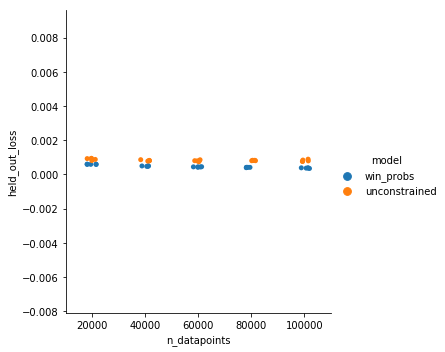

In [5]:
sns.catplot(x='n_datapoints', y='held_out_loss', hue='model', data=df)

## 1.2 - Last layer training loss for old and new model

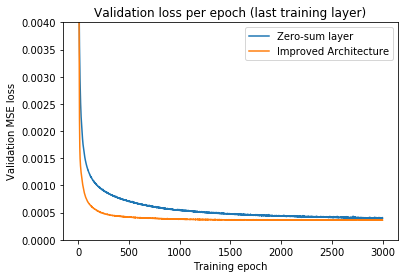

In [3]:
unconstrained_loss_data = load_tensorboard_loss_data('unconstrained_arch', *TOPOLOGICALLY_SORTED_LAYERS[-1]) # Last layer
improved_loss_data = load_tensorboard_loss_data('improved_arch', *TOPOLOGICALLY_SORTED_LAYERS[-1]) # Last layer

sns.lineplot(x=range(3000), y=unconstrained_loss_data, label='Zero-sum layer')
sns.lineplot(x=range(3000), y=improved_loss_data, label='Improved Architecture')
plt.ylim(0, 0.004)
plt.title("Validation loss per epoch (last training layer)")
plt.ylabel("Validation MSE loss")
plt.xlabel("Training epoch")
plt.show()

## 1.3 - Second to last layer training loss for old and new model

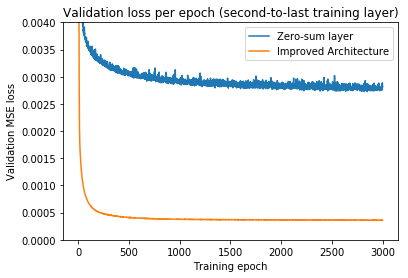

In [4]:
unconstrained_loss_data = load_tensorboard_loss_data('unconstrained_arch', *TOPOLOGICALLY_SORTED_LAYERS[-2]) # Penultimate layer
improved_loss_data = load_tensorboard_loss_data('improved_arch', *TOPOLOGICALLY_SORTED_LAYERS[-2]) # Penultimate layer

sns.lineplot(x=range(3000), y=unconstrained_loss_data, label='Zero-sum layer')
sns.lineplot(x=range(3000), y=improved_loss_data, label='Improved Architecture')
plt.ylim(0, 0.004)
plt.title("Validation loss per epoch (second-to-last training layer)")
plt.ylabel("Validation MSE loss")
plt.xlabel("Training epoch")
plt.show()

## 1.4 - Total loss by layer

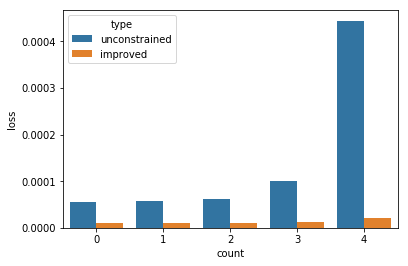

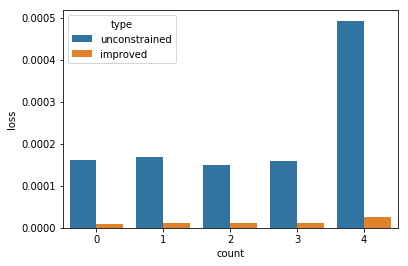

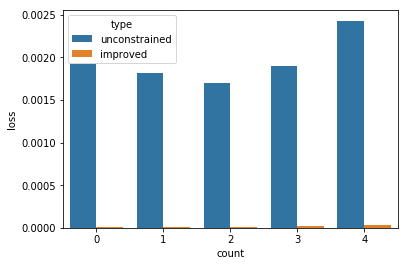

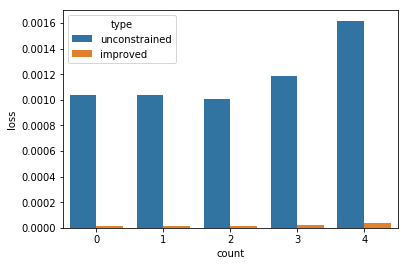

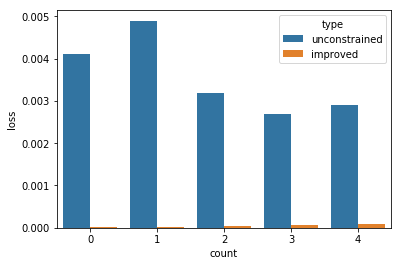

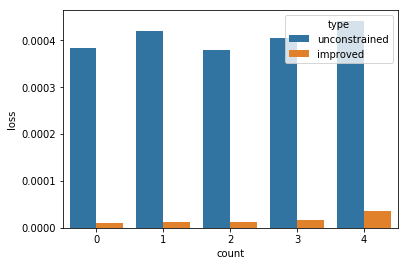

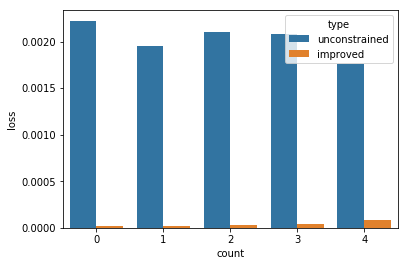

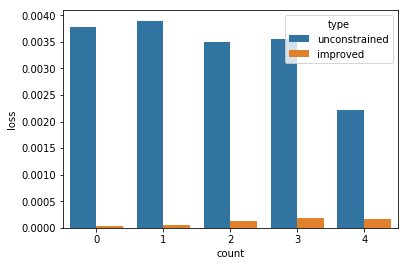

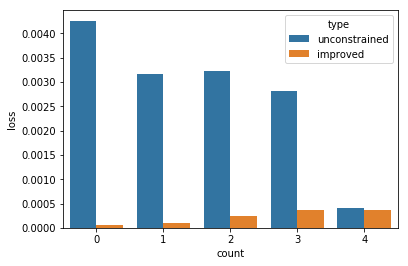

In [5]:
unconstrained_loss_data = load_tensorboard_final_losses('unconstrained_arch')
unconstrained_loss_data['type'] = 'unconstrained'
improved_loss_data = load_tensorboard_final_losses('improved_arch')
improved_loss_data['type'] = 'improved'

df = pd.concat([unconstrained_loss_data, improved_loss_data])
df['succeeds'] = df.part.apply(lambda p: p[0])
df['fails'] = df.part.apply(lambda p: p[1])
df['count'] = df.part.apply(lambda p: p[2])

for s, f in [(0, 0), (1, 0), (0, 1), (1, 1), (0, 2), (2, 0), (2, 1), (1, 2), (2, 2)]:
    sns.barplot(x='count', y="loss", hue="type", data=df[(df.succeeds == s) & (df.fails == f)])
    plt.show()

## 1.5 - Loss by distance from end

In [6]:
# is this even well formed

# Part 2: Bot vs. Bot Comparisons

In [7]:
BOT_V_BOT_GAMES = load_bot_v_bot_games()

In [9]:
lesion = lesion_load()
import gzip
with gzip.open('lesion_games.msg.gz', 'w') as f:
    lesion.to_msgpack(f)

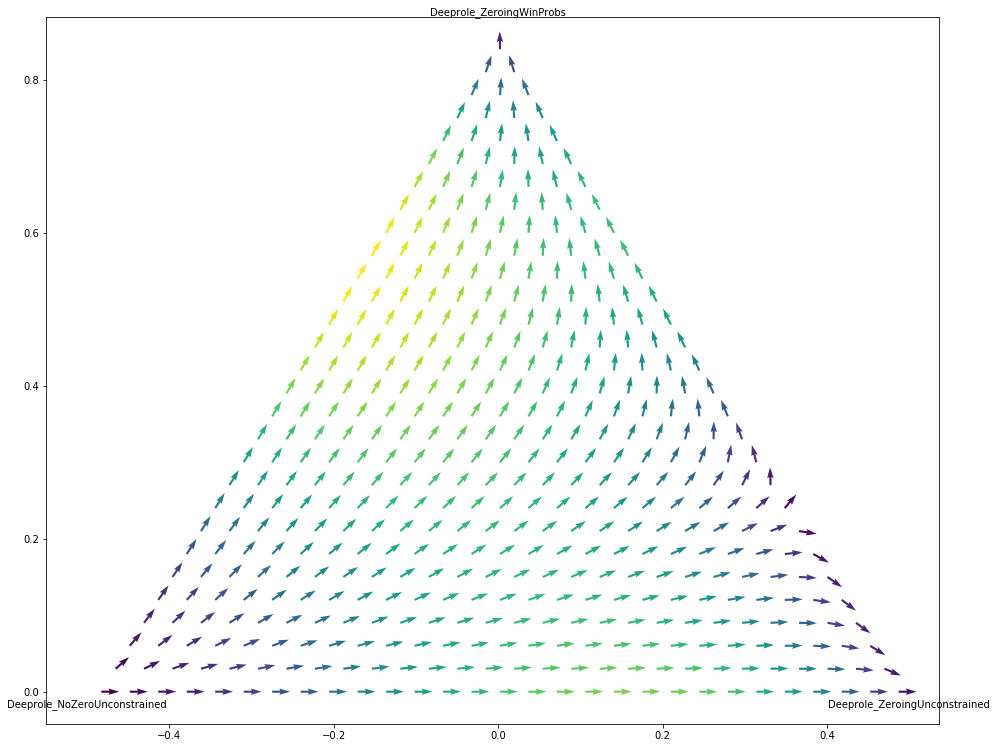

In [7]:
dr_bots = ['Deeprole_ZeroingWinProbs', 'Deeprole_ZeroingUnconstrained', 'Deeprole_NoZeroUnconstrained']
dr_games = filter_bot_v_bot_games(lesion, dr_bots)
dr_payoffs = compute_payoff_matrix(dr_games, dr_bots)
make_triangle_plot(dr_bots, lambda probs: calc_new_strat(probs, dr_payoffs))

## 2.1 - DR100 vs DR30 vs DR10 [DR vs. itself]

In [8]:
dr_bots = ['Deeprole_100_50', 'Deeprole_30_15', 'Deeprole_10_5']
dr_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, dr_bots)
dr_payoffs = compute_payoff_matrix(dr_games, dr_bots)

### 2.1.1 - Triangle chart

game_analysis.py:103: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(numerator / denominator)
display.py:45: RuntimeWarning: invalid value encountered in divide
  plt.quiver(X, Y, U/color, V/color, color, scale=1.5/scale)


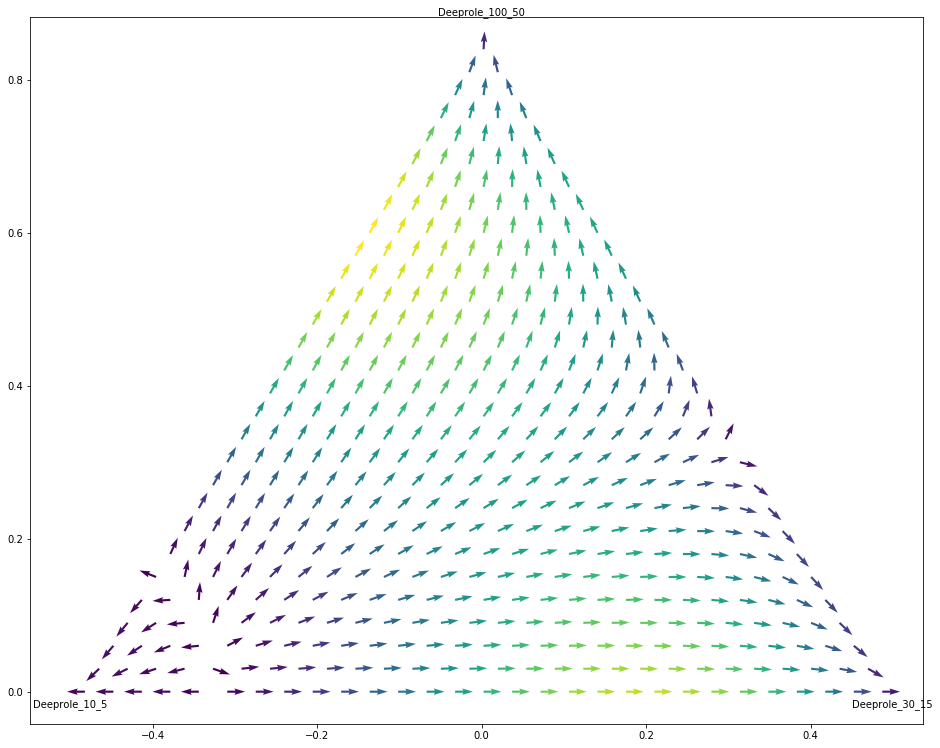

In [9]:
make_triangle_plot(dr_bots, lambda probs: calc_new_strat(probs, dr_payoffs))

### 2.1.2 - Payoff matrix

In [10]:
dr_payoffs

Deeprole_100_50_payoff  \
Deeprole_100_50_count Deeprole_30_15_count Deeprole_10_5_count                           
0                     0                    5                                  0.000000   
                      1                    4                                  0.000000   
                      2                    3                                  0.000000   
                      3                    2                                  0.000000   
                      4                    1                                  0.000000   
                      5                    0                                  0.000000   
1                     0                    4                                 -0.044286   
                      1                    3                                  0.018333   
                      2                    2                                  0.033889   
                      3                    1                                 -0.024762   
                      4                    0                                 -0.100000   
2                     0                    3                                  0.047976   
                      1                    2                                  0.077421   
                      2                    1                                  0.080635   
                      3                    0                                 -0.003095   
3                     0                    2                                  0.081270   
                      1                    1                                  0.104365   
                      2                    0                                  0.052302   
4                     0                    1                                  0.077381   
                      1                    0                                  0.048333   
5                     0                    0                                  0.000000   

                                                                Deeprole_30_15_payoff  \
Deeprole_100_50_count Deeprole_30_15_count Deeprole_10_5_count                          
0                     0                    5                                 0.000000   
                      1                    4                                -0.030476   
                      2                    3                                 0.039881   
                      3                    2                                 0.076270   
                      4                    1                                 0.067500   
                      5                    0                                 0.000000   
1                     0                    4                                 0.000000   
                      1                    3                                -0.023333   
                      2                    2                                 0.067024   
                      3                    1                                 0.074841   
                      4                    0                                 0.025000   
2                     0                    3                                 0.000000   
                      1                    2                                -0.006111   
                      2                    1                                 0.022103   
                      3                    0                                 0.002063   
3                     0                    2                                 0.000000   
                      1                    1                                -0.072619   
                      2                    0                                -0.078452   
4                     0                    1                                 0.000000   
                      1                    0                                -0.193333   
5                     0            

## 2.2 - DR100 vs CFR6K vs ObserveBot [DR vs. hand crafted methods]

In [11]:
crafted_bots = ['Deeprole', 'ObserveBot', 'CFRBot_6000000']
crafted_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, crafted_bots)
crafted_payoffs = compute_payoff_matrix(crafted_games, crafted_bots)

### 2.2.1 - Triangle Chart

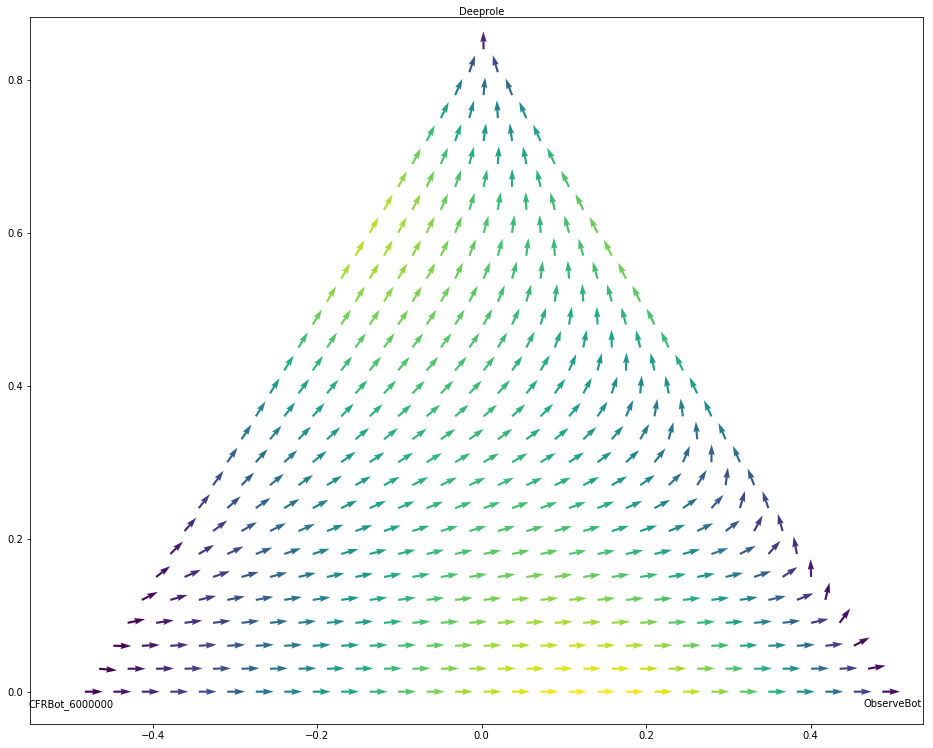

In [12]:
make_triangle_plot(crafted_bots, lambda probs: calc_new_strat(probs, crafted_payoffs))

### 2.2.2 - Payoff Table

In [13]:
crafted_payoffs

Deeprole_payoff  \
Deeprole_count ObserveBot_count CFRBot_6000000_count                    
0              0                5                            0.000000   
               1                4                            0.000000   
               2                3                            0.000000   
               3                2                            0.000000   
               4                1                            0.000000   
               5                0                            0.000000   
1              0                4                           -0.014622   
               1                3                            0.024100   
               2                2                            0.034800   
               3                1                            0.022233   
               4                0                            0.021778   
2              0                3                            0.049833   
               1                2                            0.072867   
               2                1                            0.090378   
               3                0                            0.102689   
3              0                2                            0.115504   
               1                1                            0.124278   
               2                0                            0.108956   
4              0                1                            0.116011   
               1                0                            0.094367   
5              0                0                            0.000000   

                                                      ObserveBot_payoff  \
Deeprole_count ObserveBot_count CFRBot_6000000_count                      
0              0                5                              0.000000   
               1                4                              0.124533   
               2                3                              0.142067   
               3                2                              0.136800   
               4                1                              0.103900   
               5                0                              0.000000   
1              0                4                              0.000000   
               1                3                              0.151600   
               2                2                              0.144911   
               3                1                              0.109289   
               4                0                             -0.005444   
2              0                3                              0.000000   
               1                2                              0.145644   
               2                1                              0.089100   
               3                0                             -0.068459   
3              0                2                              0.000000   
               1                1                              0.007833   
               2                0                             -0.163433   
4              0                1                              0.000000   
               1                0                             -0.377467   
5              0                0                              0.000000   

                                                      CFRBot_6000000_payoff  
Deeprole_count ObserveBot_count CFRBot_6000000_count                         
0              0                5                                  0.000000  
               1                4                                 -0.031133  
               2                3                                 -0.094711  
               3                2                                 -0.205200  
               4                1                                 -0.415600  
               5                0                                  0.000000  
1              0        

## 2.3 - DR100 vs ObserveBot and MOISMCTS [DR vs. existing methods]

<span style="color: red; font-size: 1.5em;">Can only run 1v1s.</span>

### 2.3.1 - DR vs. DR_OldNNs vs. DR_NoZero

In [32]:
drl_bots = ['Deeprole', 'Deeprole_OldNNs', 'Deeprole_NoZeroing']
drl_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, drl_bots)
drl_payoffs = compute_payoff_matrix(drl_games, drl_bots)

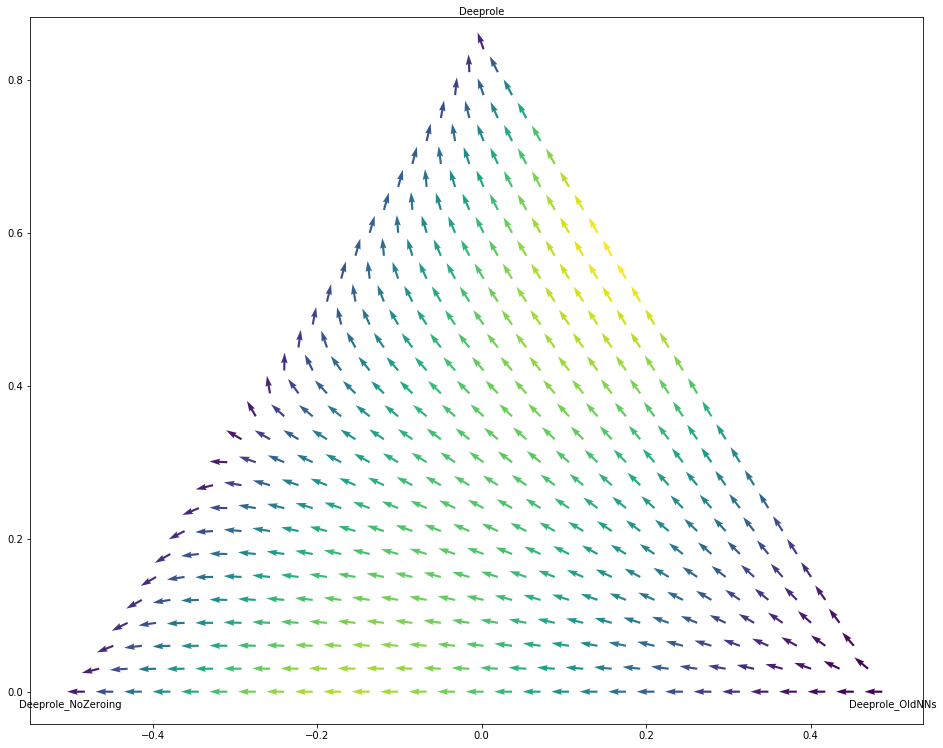

In [33]:
make_triangle_plot(drl_bots, lambda probs: calc_new_strat(probs, drl_payoffs))

### 2.3.2 - DR100 vs. MOISMCTS

In [15]:
bots = ['Deeprole', 'MOISMCTSBot']
ismcts_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, bots)
ismcts_payoff = compute_payoff_matrix(ismcts_games, bots)
ismcts_payoff

# This table indicates strict dominance

,,Deeprole_payoff,MOISMCTSBot_payoff
Deeprole_count,MOISMCTSBot_count,,
0,5,0.000000,0.000000
1,4,0.015606,-0.003902
2,3,0.041042,-0.027361
3,2,0.097260,-0.145890
4,1,0.100701,-0.402803
5,0,0.000000,0.000000


# Part 3: Human vs. Bot Comparisons

In [16]:
HUMAN_V_BOT_GAMES = load_human_v_bot_games()

## 3.1 - Winrate Data

### 3.1.1 - Overall Winrate

In [17]:
compare_humans_and_bots(HUMAN_V_BOT_GAMES, [])

,bot_winrate,human_winrate,bot_better_confidence,bot_n,human_n
num_other_bots,,,,,
0,0.600000,0.480597,0.981298,80,1675
1,0.489583,0.453125,0.843642,480,320
2,0.485646,0.498611,0.289578,1254,720
3,0.483977,0.441388,0.989409,5804,836
4,0.468800,0.388008,1.000000,7500,1451


### 3.1.2 - Breakdown by Role

#### 3.1.2.1 - By team

In [18]:
compare_humans_and_bots(HUMAN_V_BOT_GAMES, ['is_resistance'])

bot_winrate  human_winrate  \
num_other_bots is_resistance                               
0              False             0.674419       0.597015   
               True              0.513514       0.402985   
1              False             0.518519       0.555556   
               True              0.470790       0.394089   
2              False             0.681188       0.529210   
               True              0.353805       0.477855   
3              False             0.701344       0.628399   
               True              0.340578       0.318812   
4              False             0.656000       0.578151   
               True              0.344000       0.255841   

                              bot_better_confidence  bot_n  human_n  
num_other_bots is_resistance                                         
0              False                       0.832727     43      670  
               True                        0.911530     37     1005  
1              False                       0.265512    189      117  
               True                        0.954116    291      203  
2              False                       0.999989    505      291  
               True                        0.000015    749      429  
3              False                       0.996202   2307      331  
               True                        0.829768   3497      505  
4              False                       0.999838   3000      595  
               True                        1.000000   4500      856

#### 3.1.2.2 - By Merlin

In [19]:
compare_humans_and_bots(HUMAN_V_BOT_GAMES[HUMAN_V_BOT_GAMES.role == 'Merlin'], [])

,bot_winrate,human_winrate,bot_better_confidence,bot_n,human_n
num_other_bots,,,,,
0,0.454545,0.402985,0.653571,11,335
1,0.455446,0.405797,0.736391,101,69
2,0.379592,0.489209,0.018443,245,139
3,0.331897,0.283237,0.894874,1160,173
4,0.344000,0.292096,0.956246,1500,291


#### 3.1.2.3 - By Assassin

In [20]:
compare_humans_and_bots(HUMAN_V_BOT_GAMES[HUMAN_V_BOT_GAMES.role == 'Assassin'], [])

,bot_winrate,human_winrate,bot_better_confidence,bot_n,human_n
num_other_bots,,,,,
0,0.576923,0.597015,0.404915,26,335
1,0.591398,0.592593,0.498793,93,54
2,0.692000,0.482993,0.999980,250,147
3,0.706137,0.613095,0.992413,1157,168
4,0.656000,0.557823,0.999270,1500,294


# Part 4: MOAWinrate Table

In [21]:
bots = ['Deeprole', 'MOISMCTSBot']
ismcts_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, bots)
by_player = convert_to_by_player(ismcts_games)
compare_humans_and_bots(by_player, [])

,bot_winrate,human_winrate,bot_better_confidence,bot_n,human_n
num_other_bots,,,,,
0,0.436288,0.437121,0.445716,13200,13200
1,0.445417,0.428485,1.000000,52800,52800
2,0.473927,0.418056,1.000000,79200,79200
3,0.490341,0.376667,1.000000,52800,52800
4,0.471279,0.288939,1.000000,103200,13200


In [22]:
bots = ['Deeprole', 'ObserveBot']
ismcts_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, bots)
by_player = convert_to_by_player(ismcts_games)
compare_humans_and_bots(by_player, [])

,bot_winrate,human_winrate,bot_better_confidence,bot_n,human_n
num_other_bots,,,,,
0,0.467467,0.451867,0.99955,22500,22500
1,0.501022,0.456578,1.00000,90000,90000
2,0.504489,0.432563,1.00000,135000,135000
3,0.502956,0.395533,1.00000,90000,90000
4,0.471279,0.314222,1.00000,103200,22500


In [23]:
bots = ['Deeprole', 'RandomBot']
ismcts_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, bots)
by_player = convert_to_by_player(ismcts_games)
compare_humans_and_bots(by_player, [])

,bot_winrate,human_winrate,bot_better_confidence,bot_n,human_n
num_other_bots,,,,,
0,0.597156,0.479511,1.0,22500,22500
1,0.549533,0.428644,1.0,90000,90000
2,0.512296,0.380333,1.0,135000,135000
3,0.507400,0.333933,1.0,90000,90000
4,0.471279,0.206533,1.0,103200,22500


In [24]:
bots = ['Deeprole', 'CFRBot_6000000']
ismcts_games = filter_bot_v_bot_games(BOT_V_BOT_GAMES, bots)
by_player = convert_to_by_player(ismcts_games)
compare_humans_and_bots(by_player, [])

,bot_winrate,human_winrate,bot_better_confidence,bot_n,human_n
num_other_bots,,,,,
0,0.437289,0.452800,0.000466,22500,22500
1,0.454711,0.444600,0.999992,90000,90000
2,0.481726,0.421489,1.000000,135000,135000
3,0.491667,0.366222,1.000000,90000,90000
4,0.471279,0.259644,1.000000,103200,22500


In [25]:
result = create_moawt(BOT_V_BOT_GAMES, HUMAN_V_BOT_GAMES, [
    'ObserveBot', 'RandomBot', 'CFRBot_6000000', 'ISMCTSBot', 'MOISMCTSBot'
])

In [26]:
result

,Bot,Role,_4them_them_n,_4them_them_winrate,_4them_us_n,_4them_us_winrate,_4us_them_n,_4us_them_winrate,_4us_us_n,_4us_us_winrate,_4them_us_se,_4them_them_se,_4us_us_se,_4us_them_se
0,0_ObserveBot,1_all,22500.0,0.451867,22500.0,0.467467,22500.0,0.314222,103200.0,0.471279,0.003326,0.003318,0.001554,0.003095
1,0_ObserveBot,2_res,13500.0,0.259333,13500.0,0.301037,13500.0,0.200222,61920.0,0.356395,0.003948,0.003772,0.001925,0.003444
2,0_ObserveBot,3_spy,9000.0,0.740667,9000.0,0.717111,9000.0,0.485222,41280.0,0.643605,0.004748,0.004620,0.002357,0.005268
3,1_RandomBot,1_all,22500.0,0.479511,22500.0,0.597156,22500.0,0.206533,103200.0,0.471279,0.003270,0.003331,0.001554,0.002699
4,1_RandomBot,2_res,13500.0,0.397556,13500.0,0.424074,13500.0,0.035556,61920.0,0.356395,0.004253,0.004212,0.001925,0.001594
5,1_RandomBot,3_spy,9000.0,0.602444,9000.0,0.856778,9000.0,0.463000,41280.0,0.643605,0.003692,0.005159,0.002357,0.005256
6,2_CFRBot_6000000,1_all,22500.0,0.452800,22500.0,0.437289,22500.0,0.259644,103200.0,0.471279,0.003307,0.003318,0.001554,0.002923
7,2_CFRBot_6000000,2_res,13500.0,0.264000,13500.0,0.210815,13500.0,0.071630,61920.0,0.356395,0.003511,0.003794,0.001925,0.002219
8,2_CFRBot_6000000,3_spy,9000.0,0.736000,9000.0,0.777000,9000.0,0.541667,41280.0,0.643605,0.004388,0.004646,0.002357,0.005252
9,3_ISMCTSBot,1_all,15000.0,0.479600,15000.0,0.575200,15000.0,0.209067,103200.0,0.471279,0.004036,0.004079,0.001554,0.003320


In [27]:
prettify_moawt(result)

Deeprole Base               Opponent Base              
                          DR Winrate     O Winrate    DR Winrate     O Winrate
Bot              Role                                                         
0_ObserveBot     1_all         47.1%         31.4%         46.7%         45.2%
                 2_res         35.6%         20.0%         30.1%         25.9%
                 3_spy         64.4%         48.5%         71.7%         74.1%
1_RandomBot      1_all         47.1%         20.7%         59.7%         48.0%
                 2_res         35.6%          3.6%         42.4%         39.8%
                 3_spy         64.4%         46.3%         85.7%         60.2%
2_CFRBot_6000000 1_all         47.1%         26.0%         43.7%         45.3%
                 2_res         35.6%          7.2%         21.1%         26.4%
                 3_spy         64.4%         54.2%         77.7%         73.6%
3_ISMCTSBot      1_all         47.1%         20.9%         57.5%         48.0%
                 2_res         35.6%          3.6%         40.7%         39.8%
                 3_spy         64.4%         46.9%         82.8%         60.2%
4_MOISMCTSBot    1_all         47.1%         28.9%         43.6%         43.7%
                 2_res         35.6%         11.6%         15.5%         18.6%
                 3_spy         64.4%         54.8%         85.8%         81.4%
Human            1_all  46.9% + 0.6%  38.8% + 1.3%  60.0% + 5.5%  48.1% + 1.2%
                 2_res  34.4% + 0.7%  25.6% + 1.5%  51.4% + 8.2%  40.3% + 1.5%
                 3_spy  65.6% + 0.9%  57.8% + 2.0%  67.4% + 7.1%  59.7% + 1.9%

In [28]:
print prettify_moawt(result).to_latex()

\begin{tabular}{llllll}
\toprule
      &       & \multicolumn{2}{l}{Deeprole Base} & \multicolumn{2}{l}{Opponent Base} \\
      &       &    DR Winrate &     O Winrate &    DR Winrate &     O Winrate \\
Bot & Role &               &               &               &               \\
\midrule
0\_ObserveBot & 1\_all &         47.1\% &         31.4\% &         46.7\% &         45.2\% \\
      & 2\_res &         35.6\% &         20.0\% &         30.1\% &         25.9\% \\
      & 3\_spy &         64.4\% &         48.5\% &         71.7\% &         74.1\% \\
1\_RandomBot & 1\_all &         47.1\% &         20.7\% &         59.7\% &         48.0\% \\
      & 2\_res &         35.6\% &          3.6\% &         42.4\% &         39.8\% \\
      & 3\_spy &         64.4\% &         46.3\% &         85.7\% &         60.2\% \\
2\_CFRBot\_6000000 & 1\_all &         47.1\% &         26.0\% &         43.7\% &         45.3\% \\
      & 2\_res &         35.6\% &          7.2\% &         21.1\% &         26.4

In [29]:
df = pd.DataFrame([{'a': 0.0123},{'a': 0.0123},{'a': 0.0123},{'a': 0.0123}])

In [30]:
df.a.apply(lambda a: '{:0.2f}'.format(a))

0    0.01
1    0.01
2    0.01
3    0.01
Name: a, dtype: object